<a href="https://colab.research.google.com/github/adil-ak/Deep_Learning_Projects/blob/main/Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import pandas as pd

df = pd.read_csv('customer_churn.csv')

In [86]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [87]:
df.shape

(7043, 21)

In [88]:
df.drop('customerID', axis=1, inplace=True)

In [89]:
!pip install category_encoders

In [90]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [91]:
df.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [92]:
from category_encoders import OrdinalEncoder

object_columns = df.select_dtypes(include=['object']).columns
encoder = OrdinalEncoder(cols=object_columns)
df[object_columns] = encoder.fit_transform(df[object_columns])

In [93]:
df.dtypes

,0
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
MultipleLines,int64
InternetService,int64
OnlineSecurity,int64
OnlineBackup,int64


In [94]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,29.85,1,1
1,2,0,2,1,34,2,2,1,2,2,2,1,1,1,2,2,2,56.95,2,1
2,2,0,2,1,2,2,2,1,2,1,1,1,1,1,1,1,2,53.85,3,2
3,2,0,2,1,45,1,1,1,2,2,2,2,1,1,2,2,3,42.30,4,1
4,1,0,2,1,2,2,2,2,1,2,1,1,1,1,1,1,1,70.70,5,2


In [95]:
df['Churn']=df['Churn'].map({2:1,1:0})

In [96]:
x = df.drop('Churn', axis=1)
y = df['Churn']

In [97]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x, y,test_size = 0.25,random_state = 42)

#Building Model ANN

In [98]:
from tensorflow import keras

model= keras.Sequential([keras.layers.Dense(19, input_shape =(19,), activation='relu'),
                          keras.layers.Dense(15, activation='relu'),
                          keras.layers.Dense(1, activation='sigmoid')])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [99]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [100]:
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7137 - loss: 188.5841
Epoch 2/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6905 - loss: 0.9402
Epoch 3/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6938 - loss: 1.0843
Epoch 4/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7424 - loss: 0.6170
Epoch 5/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7122 - loss: 0.9268
Epoch 6/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7204 - loss: 0.8037
Epoch 7/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7057 - loss: 0.9467
Epoch 8/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7157 - loss: 0.9129
Epoch 9/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6749 - loss: 2.3532
Epoch 10/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7636 - loss: 0.5922
Epoch 11/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7364 - loss: 0.6431
Epoch 12/100
166/166 ━━━━━━━━━━━━━━━━━━

In [101]:
model.evaluate(x_test,y_test)

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7782 - loss: 0.4837


[0.49251994490623474, 0.7762634754180908]

In [107]:
y_pred=model.predict(x_test)

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [108]:
y_predictions=[]
for i in y_pred:
  if i>=0.5:
    y_predictions.append(1)
  else:
    y_predictions.append(0)

In [109]:
y_predictions[:10]

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]

In [110]:
import tensorflow as tf

cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predictions)
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1225,   57],
       [ 337,  142]], dtype=int32)>

Text(50.722222222222214, 0.5, 'Truth')

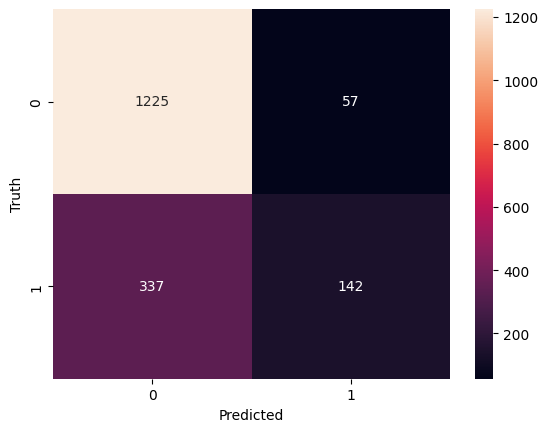

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#Evaluation

**Accuracy**

In [113]:
accuracy=(1225+142)/(1225+57+337+142)
accuracy*100

77.62634866553095

**Recall**

In [115]:
recall=(142)/(142+337)
recall*100

29.64509394572025

**Precision**

In [119]:
precision=(142)/(142+57)
precision*100

71.35678391959799

**Classification Report**

In [116]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

           0       0.78      0.96      0.86      1282
           1       0.71      0.30      0.42       479

    accuracy                           0.78      1761
   macro avg       0.75      0.63      0.64      1761
weighted avg       0.77      0.78      0.74      1761

